In [1]:
import re
from datetime import datetime

def months_difference(date1: str, date2: str) -> int:
    date1 = re.sub(r"-", "/", date1)
    date2 = re.sub(r"-", "/", date2)
    # Convert string dates to datetime objects
    d1 = datetime.strptime(date1, "%Y/%m/%d")
    d2 = datetime.strptime(date2, "%Y/%m/%d")

    # Calculate the difference in years and months
    year_diff = d2.year - d1.year
    month_diff = d2.month - d1.month

    # Total months difference
    total_months = year_diff * 12 + month_diff

    return total_months

In [2]:
import csv

# File paths
input_csv = '/content/trajectory_love.csv'  # Input CSV file path
output_csv = 'output_AO3.csv'  # Output CSV file path

# Initialize a dictionary to hold data grouped by title
title_data = {}

# Read the input CSV
with open(input_csv, 'r', newline='', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)

    # Group rows by title and accumulate keywords and romantic categories
    for row in reader:
        title = row['id']

        if title not in title_data:
            # Initialize the title's entry with the first row's data
            title_data[title] = {
                'id': row['id'],
                'kudos': row['kudos'],
                'title': row['title'],
                'romanticCategory': set([row['romanticCategory']]),  # Start with a list containing the first romantic category
                'rating': row['rating'],
                'contentWarning': row['contentWarning'],
                'words': row['words'],
                'packaged': row['packaged'],
                'published': row['published'],
                'keywords': set([row['keyword']])  # Start with a list containing the first keyword
            }
        else:
            # Add the current row's keyword to the existing list for this title
            title_data[title]['keywords'].add(row['keyword'])
            # Add the current row's romantic category to the existing list for this title
            if row['romanticCategory'] not in title_data[title]['romanticCategory']:
                title_data[title]['romanticCategory'].add(row['romanticCategory'])

# Write the result to a new CSV
with open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
    # Define the fieldnames
    fieldnames = ['id', 'kudos', 'title', 'keywords', 'amount_keywords', 'romanticCategory', 'amount_romanticCategory', 'rating', 'contentWarning', 'words', 'packaged', 'published', "up_time"]
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    writer.writeheader()

    # Write each title with its associated data and list of keywords
    for title, data in title_data.items():
        writer.writerow({
            'id': data['id'],
            'kudos': data['kudos'],
            'title': data['title'],
            'keywords': ', '.join(data['keywords']),  # Convert the list back to a string of keywords
            'amount_keywords': len(data['keywords']),
            'romanticCategory': ', '.join(data['romanticCategory']),  # Convert the list back to a string of romantic categories
            'amount_romanticCategory': len(data['romanticCategory']),
            'rating': data['rating'],
            'contentWarning': data['contentWarning'],
            'words': data['words'],
            'packaged': data['packaged'],
            'published': data['published'],
            'up_time': months_difference(data['published'], data['packaged'][:-9])
        })

Wat willen we gaan visualiseren?

kudos distributie/gemiddelde


aantal keywords distributie/gemiddelde


keyword verdeling


aantal woorden distributie/gemiddelde


aantal maanden online distributie/gemiddelde


romantic category distributie


rating distributie


contentwarning distributie

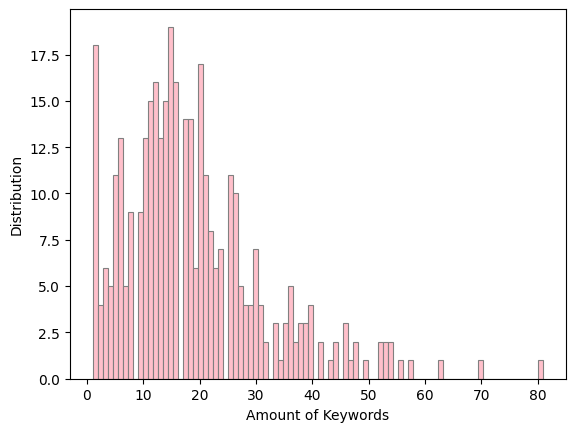

the mean amount of keywords: 18.73


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/output_AO3.csv")

array = df["amount_keywords"].to_numpy()

# Create the histogram with customized settings
plt.hist(array, bins=90, color='pink', edgecolor='grey', linewidth=0.8)

# Customize axis labels and title
plt.xlabel("Amount of Keywords")
plt.ylabel("Distribution")

# Display the plot
plt.show()

array_mean = np.mean(array)
print("the mean amount of keywords:", round(array_mean, 2))

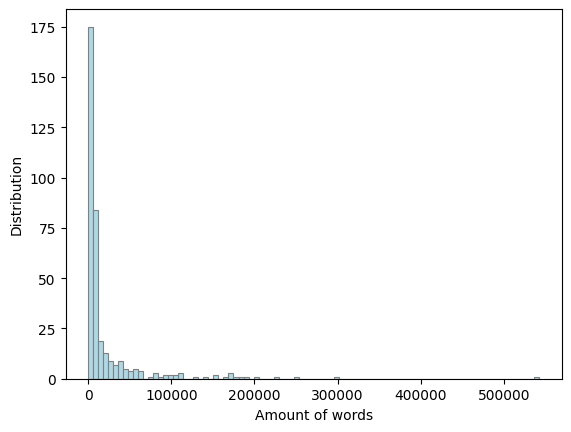

the mean amount of words: 22520.96


In [4]:
array = df["words"].to_numpy()

# Create the histogram with customized settings
plt.hist(array, bins=90, color='lightblue', edgecolor='grey', linewidth=0.8)

# Customize axis labels and title
plt.xlabel("Amount of words")
plt.ylabel("Distribution")

# Display the plot
plt.show()

array_mean = np.mean(array)
print("the mean amount of words:", round(array_mean, 2))

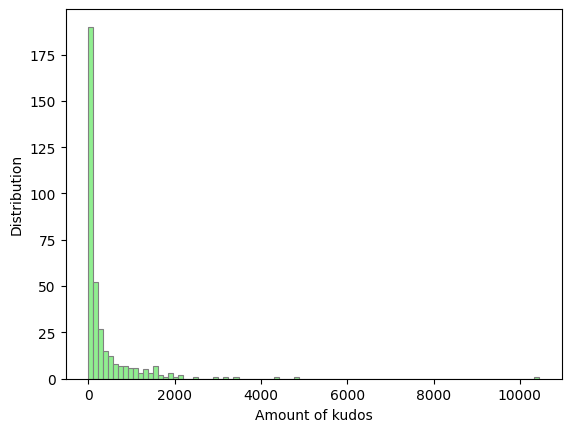

the mean amount of kudos: 384.51


In [5]:
array = df["kudos"].to_numpy()

# Create the histogram with customized settings
plt.hist(array, bins=90, color='lightgreen', edgecolor='grey', linewidth=0.8)

# Customize axis labels and title
plt.xlabel("Amount of kudos")
plt.ylabel("Distribution")

# Display the plot
plt.show()

array_mean = np.mean(array)
print("the mean amount of kudos:", round(array_mean, 2))

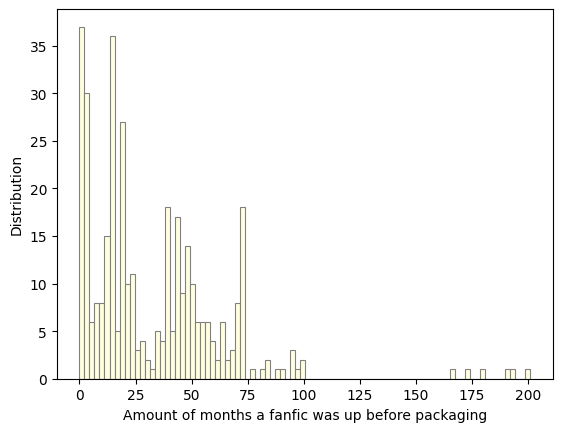

the mean amount of months a fanfic was up before packaging: 33.12


In [6]:
array = df["up_time"].to_numpy()

# Create the histogram with customized settings
plt.hist(array, bins=90, color='lightyellow', edgecolor='grey', linewidth=0.8)

# Customize axis labels and title
plt.xlabel("Amount of months a fanfic was up before packaging")
plt.ylabel("Distribution")

# Display the plot
plt.show()

array_mean = np.mean(array)
print("the mean amount of months a fanfic was up before packaging:", round(array_mean, 2))

                         Keywords  Keyword_Count
0               Friends to Lovers            207
1       Alpha/Beta/Omega Dynamics            150
2                           Fluff             94
3               Enemies to Lovers             91
4                       Slow Burn             62
...                           ...            ...
3242              Destiel endgame              1
3243  others think they're dating              1
3244        Relationship Problems              1
3245       The Jungle (Teen Wolf)              1
3246                    thank you              1

[3247 rows x 2 columns]
the mean amount of times a keyword was used: 2.1


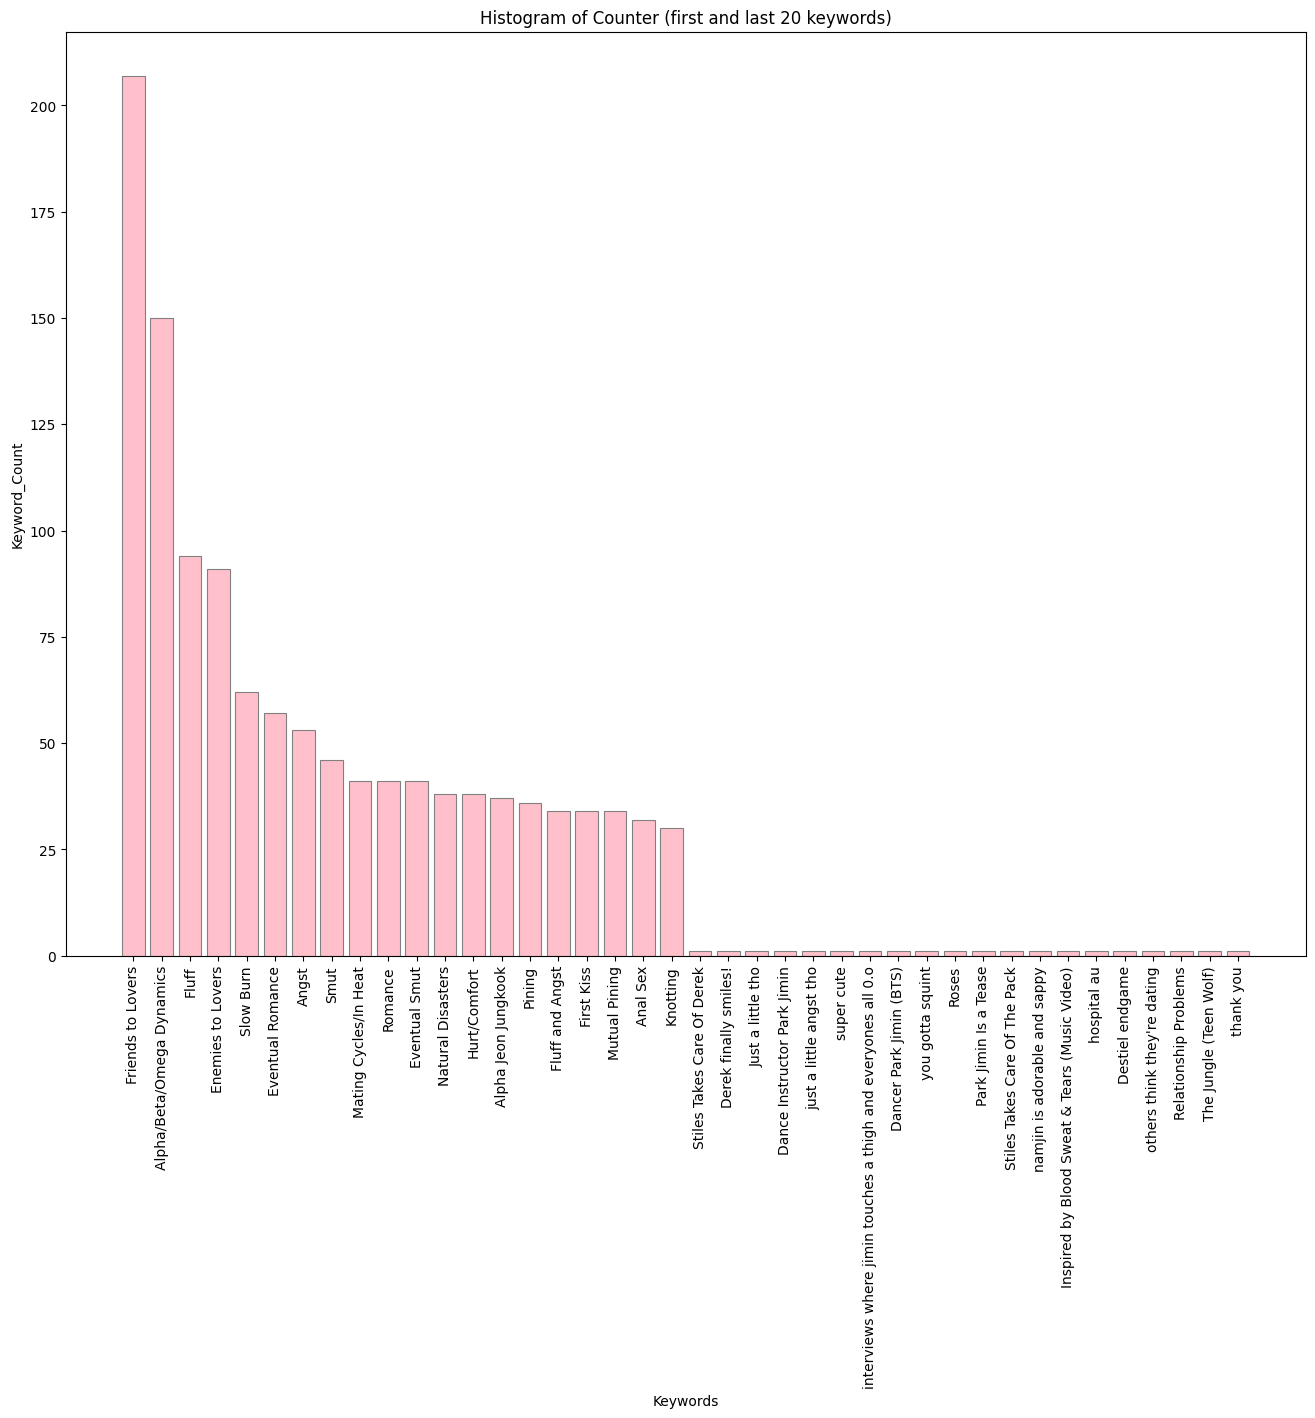

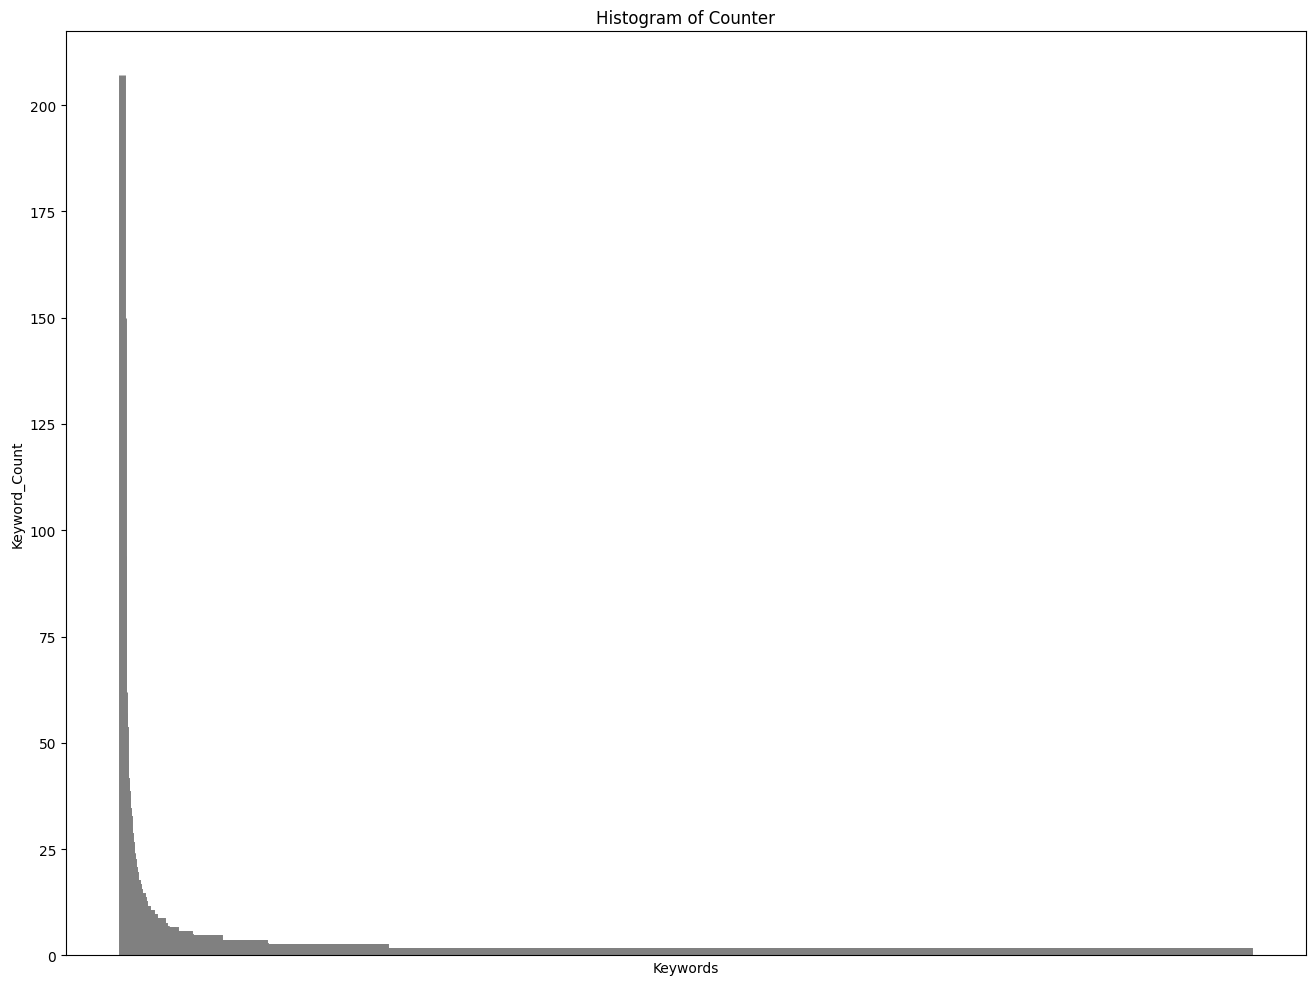

In [7]:
from collections import Counter
import ast

# Create a list of documents where each document is a string of keywords
documents = df["keywords"].dropna().tolist()  # Drop NaN values
# Split keywords by comma and join back into a single string for each entry
documents = [doc.split(', ') for doc in documents]

keywords = []
for i in documents:
  for j in i:
    keywords.append(j)

counter = Counter(keywords)

def counter_to_sorted_df(counter):
    # Convert Counter to DataFrame
    df = pd.DataFrame(counter.items(), columns=['Keywords', 'Keyword_Count'])

    # Sort by 'Count' in descending order
    df = df.sort_values(by='Keyword_Count', ascending=False).reset_index(drop=True)

    return df

# Example usage
sorted_df_key = counter_to_sorted_df(counter)
print(sorted_df_key)

count = sorted_df_key["Keyword_Count"].to_numpy()
count_mean = np.mean(count)
print("the mean amount of times a keyword was used:", round(count_mean, 2))

first_20_key = sorted_df_key['Keywords'].head(20)
last_20_key = sorted_df_key['Keywords'].tail(20)
first_20_count = sorted_df_key['Keyword_Count'].head(20)
last_20_count = sorted_df_key['Keyword_Count'].tail(20)

combined = pd.concat([first_20_key, last_20_key], ignore_index=True)
sorted_df_key_alt = pd.DataFrame(combined, columns=['Keywords'])

combined = pd.concat([first_20_count, last_20_count], ignore_index=True)
sorted_df_key_alt["Keyword_Count"] = combined

plt.figure(figsize=(16, 12))
plt.bar(sorted_df_key_alt['Keywords'], sorted_df_key_alt['Keyword_Count'], color='pink', edgecolor='grey', linewidth=0.8)
plt.xlabel('Keywords')
plt.ylabel('Keyword_Count')
plt.title('Histogram of Counter (first and last 20 keywords)')

plt.xticks(rotation=90)

plt.show()

plt.figure(figsize=(16, 12))
plt.bar(sorted_df_key['Keywords'], sorted_df_key['Keyword_Count'], color='grey', edgecolor='grey', linewidth=5)
plt.xlabel('Keywords')
plt.ylabel('Keyword_Count')
plt.title('Histogram of Counter')

plt.xticks([])

plt.show()

                 Ratings  Rating_Count
0               Explicit           124
1                 Mature            98
2  Teen And Up Audiences            73
3              Not Rated            40
4      General Audiences            29
the mean amount of times a rating was used: 72.8


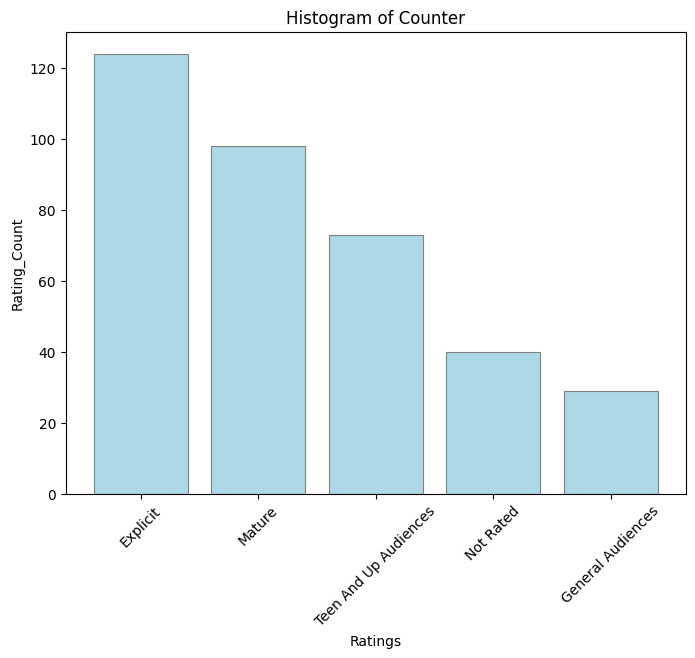

In [8]:
# Create a list of documents where each document is a string of rating
documents = df["rating"].dropna().tolist()  # Drop NaN values
# Split rating by comma and join back into a single string for each entry
documents = [doc.split(', ') for doc in documents]

rating = []
for i in documents:
  for j in i:
    rating.append(j)

counter = Counter(rating)

def counter_to_sorted_df(counter):
    # Convert Counter to DataFrame
    df = pd.DataFrame(counter.items(), columns=['Ratings', 'Rating_Count'])

    # Sort by 'Count' in descending order
    df = df.sort_values(by='Rating_Count', ascending=False).reset_index(drop=True)

    return df

# Example usage
sorted_df_rat = counter_to_sorted_df(counter)
print(sorted_df_rat)

count = sorted_df_rat["Rating_Count"].to_numpy()
count_mean = np.mean(count)
print("the mean amount of times a rating was used:", round(count_mean, 2))

plt.figure(figsize=(8, 6))
plt.bar(sorted_df_rat['Ratings'], sorted_df_rat['Rating_Count'], color='lightblue', edgecolor='grey', linewidth=0.8)
plt.xlabel('Ratings')
plt.ylabel('Rating_Count')
plt.title('Histogram of Counter')

plt.xticks(rotation=45)

plt.show()

                              ContentWarning  ContentWarning_Count
0                  No Archive Warnings Apply                   158
1  Creator Chose Not To Use Archive Warnings                   142
2             Graphic Depictions Of Violence                    48
3                      Major Character Death                     8
4                                   Underage                     6
5                               Rape/Non-Con                     2
the mean amount of times a contentWarning was used: 60.67


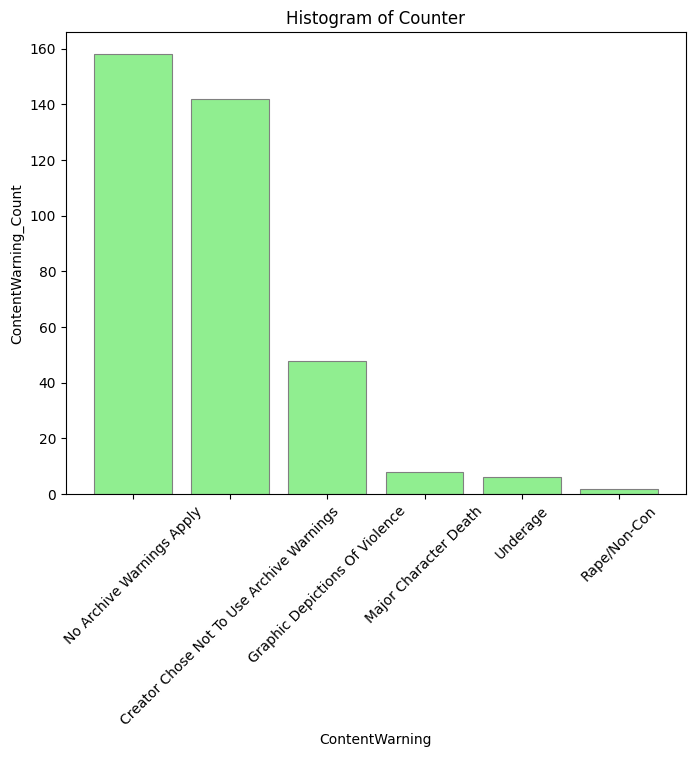

In [9]:
# Create a list of documents where each document is a string of contentWarning
documents = df["contentWarning"].dropna().tolist()  # Drop NaN values
# Split contentWarning by comma and join back into a single string for each entry
documents = [doc.split(', ') for doc in documents]

contentWarning = []
for i in documents:
  for j in i:
    contentWarning.append(j)

counter = Counter(contentWarning)

def counter_to_sorted_df(counter):
    # Convert Counter to DataFrame
    df = pd.DataFrame(counter.items(), columns=['ContentWarning', 'ContentWarning_Count'])

    # Sort by 'Count' in descending order
    df = df.sort_values(by='ContentWarning_Count', ascending=False).reset_index(drop=True)

    return df

# Example usage
sorted_df_con = counter_to_sorted_df(counter)
print(sorted_df_con)

count = sorted_df_con["ContentWarning_Count"].to_numpy()
count_mean = np.mean(count)
print("the mean amount of times a contentWarning was used:", round(count_mean, 2))

plt.figure(figsize=(8, 6))
plt.bar(sorted_df_con['ContentWarning'], sorted_df_con['ContentWarning_Count'], color='lightgreen', edgecolor='grey', linewidth=0.8)
plt.xlabel('ContentWarning')
plt.ylabel('ContentWarning_Count')
plt.title('Histogram of Counter')

plt.xticks(rotation=45)

plt.show()

  RomanticCategory  RomanticCategory_Count
0              M/M                     276
1              F/M                     132
2              F/F                      43
3            Multi                      29
4              Gen                      25
5            Other                       8
the mean amount of times a romanticCategory was used: 85.5


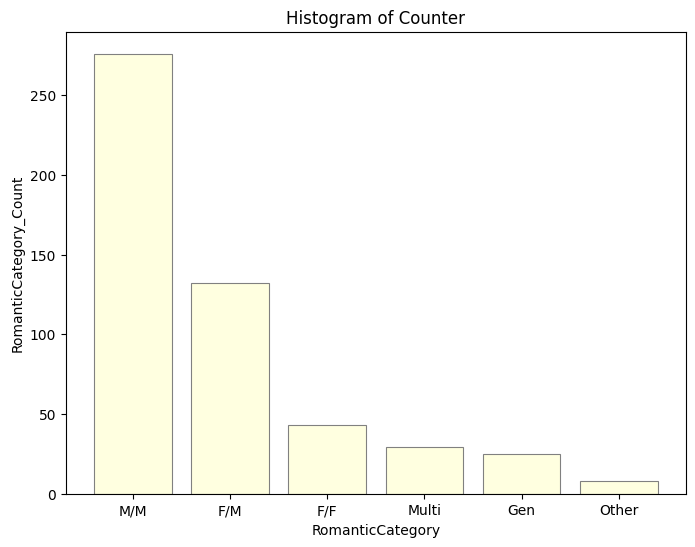

In [10]:
# Create a list of documents where each document is a string of romanticCategory
documents = df["romanticCategory"].dropna().tolist()  # Drop NaN values
# Split romanticCategory by comma and join back into a single string for each entry
documents = [doc.split(', ') for doc in documents]

romanticCategory = []
for i in documents:
  for j in i:
    romanticCategory.append(j)

counter = Counter(romanticCategory)

def counter_to_sorted_df(counter):
    # Convert Counter to DataFrame
    df = pd.DataFrame(counter.items(), columns=['RomanticCategory', 'RomanticCategory_Count'])

    # Sort by 'Count' in descending order
    df = df.sort_values(by='RomanticCategory_Count', ascending=False).reset_index(drop=True)

    return df

# Example usage
sorted_df_rom = counter_to_sorted_df(counter)
print(sorted_df_rom)

count = sorted_df_rom["RomanticCategory_Count"].to_numpy()
count_mean = np.mean(count)
print("the mean amount of times a romanticCategory was used:", round(count_mean, 2))

plt.figure(figsize=(8, 6))
plt.bar(sorted_df_rom['RomanticCategory'], sorted_df_rom['RomanticCategory_Count'], color='lightyellow', edgecolor='grey', linewidth=0.8)
plt.xlabel('RomanticCategory')
plt.ylabel('RomanticCategory_Count')
plt.title('Histogram of Counter')

plt.show()

In [11]:
dist_df = pd.concat([sorted_df_key, sorted_df_rat, sorted_df_con, sorted_df_rom], axis=1)
print(dist_df)
dist_df.to_csv("distributions.csv", encoding='utf-8')

                         Keywords  Keyword_Count                Ratings  \
0               Friends to Lovers            207               Explicit   
1       Alpha/Beta/Omega Dynamics            150                 Mature   
2                           Fluff             94  Teen And Up Audiences   
3               Enemies to Lovers             91              Not Rated   
4                       Slow Burn             62      General Audiences   
...                           ...            ...                    ...   
3242              Destiel endgame              1                    NaN   
3243  others think they're dating              1                    NaN   
3244        Relationship Problems              1                    NaN   
3245       The Jungle (Teen Wolf)              1                    NaN   
3246                    thank you              1                    NaN   

      Rating_Count                             ContentWarning  \
0            124.0                